# Fisher Discriminant Analysis – (Using scikit-learn)
This notebook demonstrates how to apply Fisher Discriminant Analysis using `sklearn`'s `LinearDiscriminantAnalysis`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")

## Load and Inspect the Iris Dataset

In [8]:
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Apply LDA to Reduce Dimensions and Visualize

In [18]:
# With one component
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

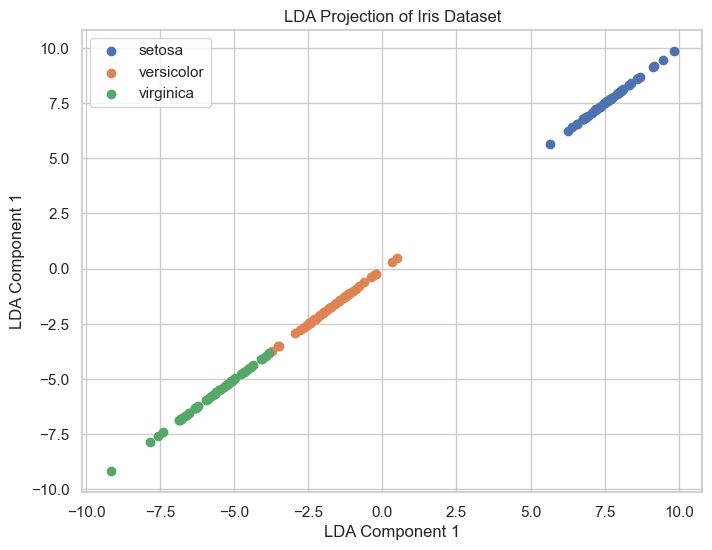

In [15]:
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 0], label=iris.target_names[label])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 1')
plt.title('LDA Projection of Iris Dataset')
plt.legend()
plt.show()

In [16]:
# With two components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

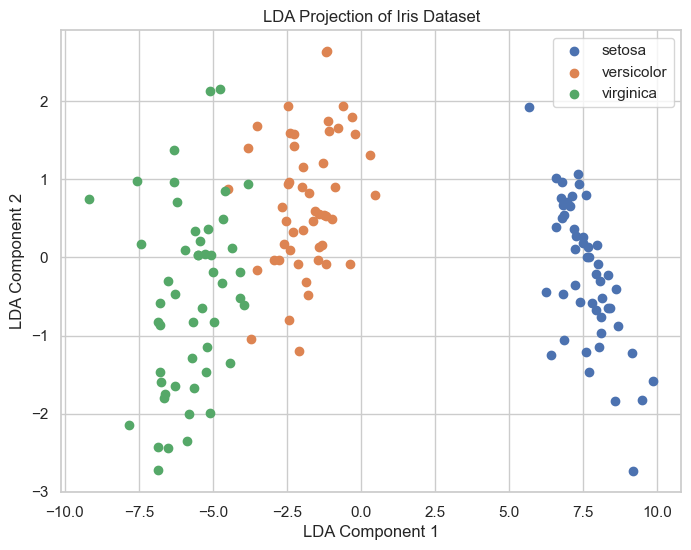

In [17]:
plt.figure(figsize=(8,6))
for label in np.unique(y):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=iris.target_names[label])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of Iris Dataset')
plt.legend()
plt.show()

## Classification: LDA as Preprocessing + Logistic Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [30]:
y_test

array([2, 1, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2,
       1])

In [31]:
# With one vcomponent
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
y_train_pred = clf.predict(X_train_lda)
y_test_pred = clf.predict(X_test_lda)
print("Confusion Matrix:Train")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:Train")
print(classification_report(y_train, y_train_pred))

print("Confusion Matrix:Test")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:Test")
print(classification_report(y_test, y_test_pred))

Confusion Matrix:Train
[[35  0  0]
 [ 0 33  2]
 [ 0  0 35]]

Classification Report:Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.94      0.97        35
           2       0.95      1.00      0.97        35

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Confusion Matrix:Test
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Classification Report:Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

model_steps = [('scale',StandardScaler()),("dr",PCA(n_components=0.95)),("clf",SVC())]
model = Pipeline(steps=model_steps)
model.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('dr', PCA(n_components=0.95)),
                ('clf', SVC())])